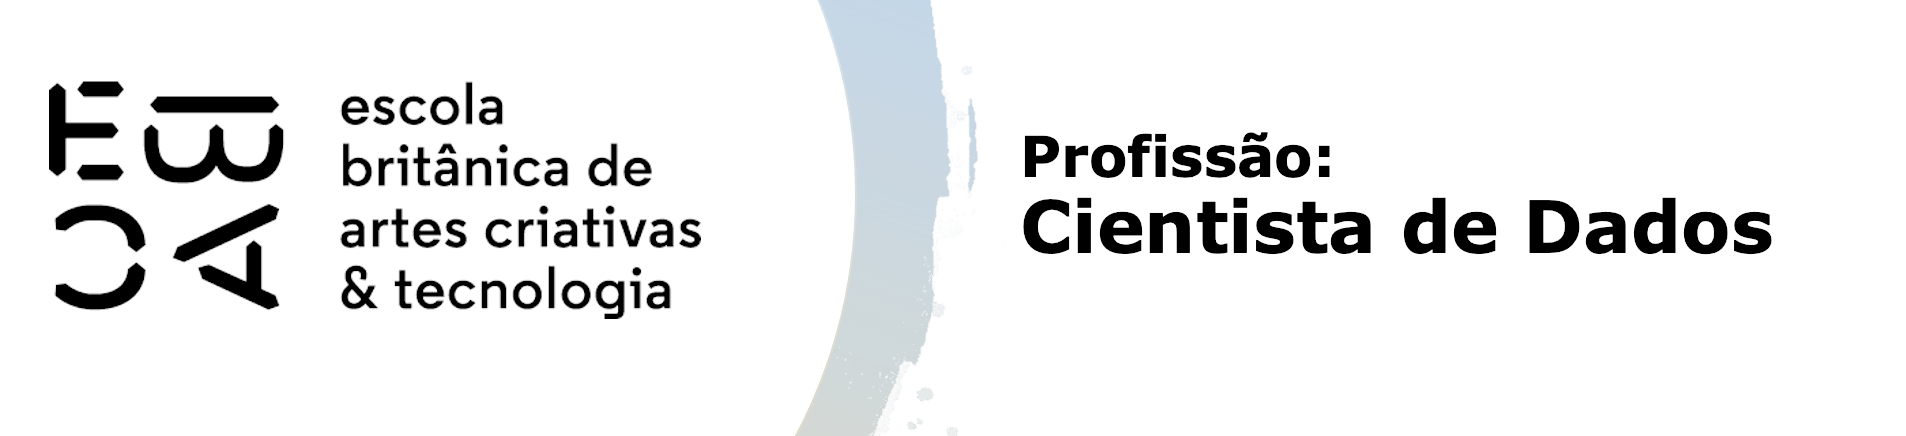

# Métodos hierárquicos de agrupamento - Tarefa

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [55]:
# Carregando a base de pinguins
df = sns.load_dataset('penguins')

In [56]:
# 1. Selecionando as variáveis quantitativas
quantitative_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_quant = df[quantitative_vars]

In [57]:
# 2. Eliminando valores faltantes
df_quant = df_quant.dropna()

In [58]:
# 3. Padronizando as variáveis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quant)

In [59]:
# 4. Agrupamento hierárquico
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_id = cluster.fit_predict(df_scaled)
df_quant['Cluster'] = cluster_id

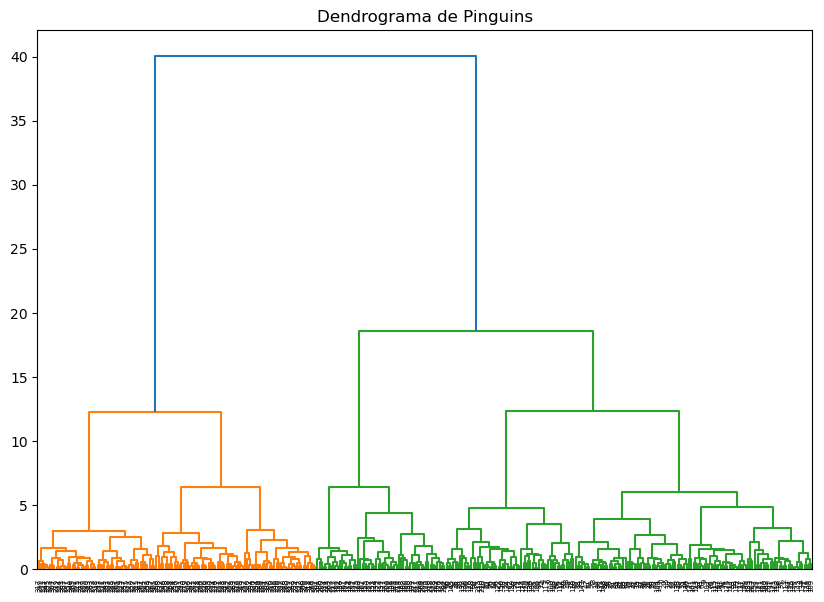

In [60]:
# 5. Dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma de Pinguins")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [61]:
# Selecionando as variáveis quantitativas e removendo valores faltantes
df_quant = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna()
df = df.loc[df_quant.index]  # Atualizando o DataFrame original para refletir a remoção de valores faltantes

In [62]:
# Padronizando as variáveis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quant)

In [63]:
# Realizando um agrupamento hierárquico
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_id = cluster.fit_predict(df_scaled)
df_quant['Cluster'] = cluster_id

In [64]:
# Adicionando a coluna Cluster ao DataFrame
df['Cluster'] = cluster_id

In [65]:
# Contagem dos pinguins por espécie
contagem_especies_por_cluster = df.groupby('Cluster')['species'].value_counts()
print(contagem_especies_por_cluster)

Cluster  species  
0        Adelie       151
         Chinstrap     11
1        Gentoo       123
2        Chinstrap     57
Name: count, dtype: int64


In [66]:
medias_por_cluster = df.groupby('Cluster')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean()
print(medias_por_cluster)

         bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                               
0             39.150000      18.287654         189.901235  3675.771605
1             47.504878      14.982114         217.186992  5076.016260
2             49.752632      18.601754         197.105263  3810.087719


### Abaixo as características médias de cada cluster

#### Cluster 0:

**Comprimento do bico (bill_length_mm):** 39.15 mm<br>
**Profundidade do bico (bill_depth_mm):** 18.29 mm<br>
**Comprimento da nadadeira (flipper_length_mm):** 189.90 mm<br>
**Massa corporal (body_mass_g):** 3675.77 g

#### Cluster 1:

**Comprimento do bico (bill_length_mm):** 47.50 mm<br>
**Profundidade do bico (bill_depth_mm):** 14.98 mm<br>
**Comprimento da nadadeira (flipper_length_mm):** 217.19 mm<br>
**Massa corporal (body_mass_g):** 5076.02 g

#### Cluster 2:

**Comprimento do bico (bill_length_mm):** 49.75 mm<br>
**Profundidade do bico (bill_depth_mm):** 18.60 mm<br>
**Comprimento da nadadeira (flipper_length_mm):** 197.11 mm<br>
**Massa corporal (body_mass_g):** 3810.09 g
<br><br><br>Ao comparar os clusters:<br>

- **O Cluster 0** tem pinguins com bicos mais curtos e mais profundos, nadadeiras mais curtas e uma massa corporal menor. Essa descrição é consistente com o que se sabe sobre os pinguins Adelie, que predominam neste cluster.
<br><br>
- **O Cluster 1** apresenta pinguins com bicos mais longos, mas menos profundos, além de nadadeiras mais longas e maior massa corporal. Essas características são comuns aos pinguins Gentoo.
<br><br>
- **O Cluster 2** tem pinguins com bicos bastante longos e profundos, nadadeiras de tamanho intermediário e uma massa corporal também intermediária. Essas características são consistentes com os pinguins Chinstrap, que predominam neste cluster.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

#### Ao olhar para o dendrograma anterior, podemos perceber que há níveis de corte que resultariam em mais de três grupos. Podemos tentar um corte que forme 5 grupos para fins de análise.

In [67]:
# Realizando o agrupamento hierárquico com 5 grupos

In [68]:
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster'] = cluster.fit_predict(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [69]:
# Analisando os agrupamentos para saber quantos pinguins de cada espécia há em cada grupo
contagem_especies_por_cluster = df.groupby('Cluster')['species'].value_counts()
print(contagem_especies_por_cluster)

Cluster  species  
0        Adelie       72
         Chinstrap    44
         Gentoo        6
1        Adelie       54
         Chinstrap    17
2        Gentoo       36
         Adelie       25
         Chinstrap     7
3        Gentoo       47
4        Gentoo       34
Name: count, dtype: int64


In [70]:
# Analisando os agrupamentos para saber quantos machos e fêmeas há em cada grupo
contagem_especies_sexo_por_cluster = df.groupby(['Cluster', 'species'])['sex'].value_counts()
print(contagem_especies_sexo_por_cluster)

Cluster  species    sex   
0        Adelie     Male      46
                    Female    25
         Chinstrap  Male      23
                    Female    21
         Gentoo     Female     5
1        Adelie     Female    48
                    Male       3
         Chinstrap  Female    13
                    Male       4
2        Adelie     Male      24
         Chinstrap  Male       7
         Gentoo     Female    33
                    Male       1
3        Gentoo     Male      26
                    Female    20
4        Gentoo     Male      34
Name: count, dtype: int64


# Análise:
    
Os resultados mostram que o agrupamento capturou alguns padrões:<br><br>

- **Padrões de Espécie:** Os pinguins Gentoo tendem a ser agrupados juntos (Clusters 2, 3, e 4), enquanto os Adelie e Chinstrap são muitas vezes agrupados juntos (Clusters 0 e 1). Isso pode indicar características semelhantes entre os pinguins Gentoo que os distinguem dos outros dois.
<br><br>
- **Padrões de Sexo:**  Há certa segregação baseada no sexo em alguns clusters, como visto no Cluster 1 (Adelie femininos) e Cluster 4 (Gentoo masculinos). Isso sugere que os pinguins masculinos e femininos de certas espécies podem ter características distintas que influenciam o agrupamento.

Em resumo, o agrupamento parece ter capturado padrões naturais com base na espécie e no sexo dos pinguins. A distinção dos pinguins Gentoo nos clusters, bem como a segregação baseada no sexo em alguns clusters, sugere que esses dois fatores desempenham um papel significativo na diferenciação dos pinguins.